<a href="https://colab.research.google.com/github/shengxiaobufu/DL_learning/blob/main/torch/test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## torch.utils.data
区分清楚Dataset和Dataloader的概念就可以，前者是真实的数据集对象，存储数据的，后者只是一个包装的迭代器，用于按照指定的batch_size在需要的时候迭代dataset对象

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor  # 这是专门的transforms的库，也可以自己实现
import matplotlib.pyplot as plt

In [17]:
train_data = datasets.FashionMNIST(
    root='.',
    train=True,
    download=True,
    transform=ToTensor(),  # 用于feature处理
    # target_transform 用于label处理
)
test_data = datasets.FashionMNIST(
    root='.',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16508502.69it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299815.90it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5557418.62it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13520524.10it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [38]:
# data item is sliceable and each item is a tuple of (features, label)
# cause we use ToTensor here, features are transformed to tensor
print(type(train_data))  # a subclass of torchvision.datasets
print(type(train_data[0]))
print(type(train_data[0][0]))
print(type(train_data[0][1]))
print(train_data[0][1])
print(len(train_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>
9
60000


In [39]:
!mkdir tmp_data

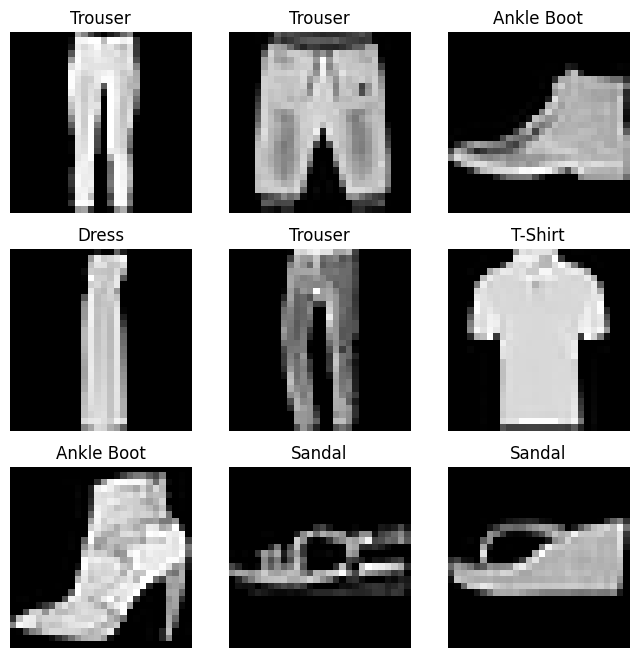

In [27]:
# Visualizing
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


plt.show()

In [37]:
# img here is a number which reflects color
print(img.size())
print(img.squeeze().size())
print(img[0, :, 0])

torch.Size([1, 28, 28])
torch.Size([28, 28])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1804, 0.4078, 0.2471, 0.0667,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


## Create my own dataset

In [40]:
# A custom Dataset class must implement three functions:
  # __init__ : define input
  # __len__ : return of len()
  # __getitem__ : return of slice, a tuple of (features, label), merge logic of transfrom inside
  # acutrally transfrom is always a external function and used as __init__'s input
from torch.utils.data import Dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # input allows only int idx
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Create my own dataloader

In [41]:
# DataLoader is an iterable that abstracts this complexity for us in an easy API.
# 官方文档说了loader就是一个可迭代对象，底层估计是生成器

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# 自然可以调用next(iter()))方法来抛出下一个对象
# 这里每次run都可以看到不一样的图，因为在向后迭代
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")